# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Description of the data

The dataset contains the following fields:
- `price`

- `model_year`

- `model`

- `condition`

- `cylinders`

- `fuel` — gas, diesel, etc.

- `odometer` — the vehicle's mileage when the ad was published

- `transmission`

- `paint_color`

- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)

- `date_posted` — the date the ad was published

- `days_listed` — from publication to removal

Plans of action for this data, is mostly to study the correlation between culumns. Vizualise it and extract the influential underlying factors.

## Open the data file and study the general information. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
import math
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns

- Target feature: **Price**. 
- Which factors impact on the price?

In [2]:
car_sales_df = pd.read_csv('/datasets/vehicles_us.csv', sep=',')

- Nmbre of rows:

In [3]:
len(car_sales_df)

51525

In [4]:
car_sales_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
car_sales_df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
47366,4950,2008.0,toyota corolla,excellent,4.0,gas,127000.0,automatic,sedan,blue,NaN,2018-12-25,43
42941,5900,2010.0,nissan rogue,good,4.0,gas,136000.0,automatic,SUV,silver,1.0,2018-08-06,22
17702,27905,2018.0,toyota tacoma,like new,6.0,gas,NaN,automatic,truck,grey,NaN,2018-09-02,15
20483,4995,2012.0,ford fusion,excellent,4.0,gas,150000.0,automatic,sedan,white,NaN,2018-09-08,110
47914,16999,2015.0,subaru outback,excellent,4.0,gas,99046.0,automatic,SUV,green,1.0,2019-01-01,71


In [6]:
car_sales_df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


- Checking on NAs

Percentage  of NAs

In [8]:
100*car_sales_df.isnull().sum()/car_sales_df.shape[0]

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

we see here `is_4wd` is the column with the most missing values.

In [9]:
car_sales_missing = car_sales_df.isna().sum()

The total nmbre of missing values for each column:

In [10]:
car_sales_missing

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

- Gathering all missing data together and calling it `just_na`

In [11]:
just_na = pd.concat([car_sales_df['model_year'], car_sales_df['cylinders'], car_sales_df['odometer'], car_sales_df['paint_color'], car_sales_df['is_4wd']], axis=1)
just_na.columns = ["na_model_yers","na_cylinders","na_odometer","na_paint_color","na_is_4wd"]
just_na.head()
len(just_na)

51525

Let's create a dataframe showing details about missing values.

In [12]:
car_sales_missing_df = pd.concat([just_na.dtypes, just_na.isna().sum(), just_na.isna().sum()/len(just_na)], axis=1)
car_sales_missing_df.columns = ["na_type", "na_count", "na_ratio"]
car_sales_missing_df.sort_values(by="na_ratio", ascending=True)

,na_type,na_count,na_ratio
na_model_yers,float64,3619,0.070238
na_cylinders,float64,5260,0.102086
na_odometer,float64,7892,0.153168
na_paint_color,object,9267,0.179854
na_is_4wd,float64,25953,0.503697


Clearly `is_4wd` column is a Boolean column

In [13]:
just_na['na_is_4wd'].value_counts()
#and so all other rows are missing

1.0    25572
Name: na_is_4wd, dtype: int64

**Showing different categorical columns:**
- `model_year`

In [14]:
print(car_sales_df['model_year'].max())

2019.0


In [15]:
print(car_sales_df['model_year'].min())

1908.0


- `model`

In [16]:
car_sales_df["model"].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

- `condition` :

In [17]:
car_sales_df["condition"].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

- `fuel`

In [18]:
car_sales_df["fuel"].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

- `transmission`

In [19]:
car_sales_df["transmission"].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

- `type`

In [20]:
car_sales_df["type"].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

- `paint_color`

In [21]:
car_sales_df["paint_color"].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

**Showing different quantitative columns:**

- `price`

Ploting a bar chart showing price for each car model.

In [22]:
name_models = car_sales_df.pivot_table(index='model', values='price')

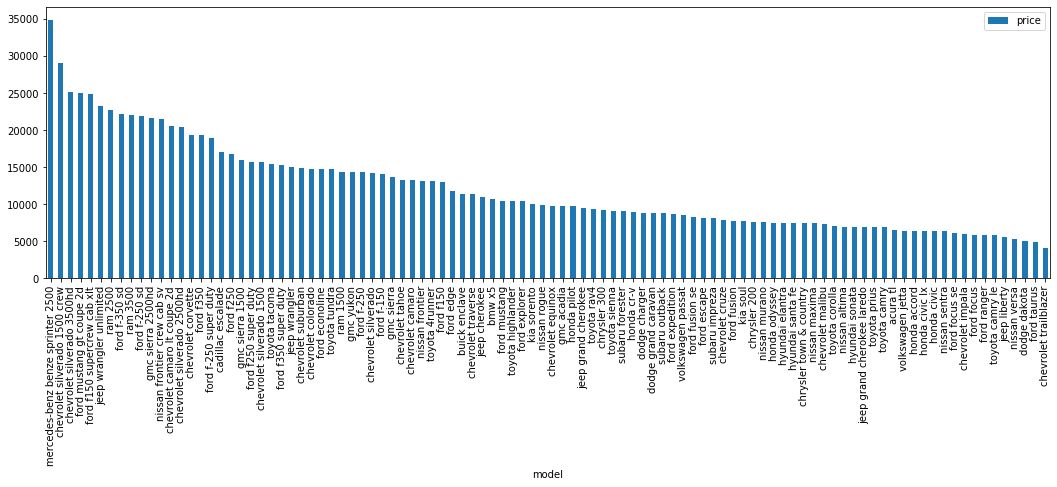

In [23]:
name_models.sort_values(by='price',ascending=False).plot(kind='bar', figsize=(18,5))

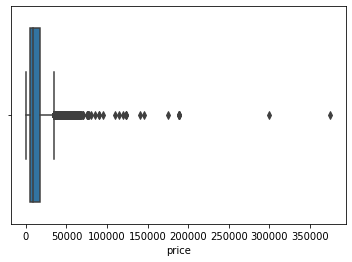

In [24]:
sns.boxplot(car_sales_df['price'])

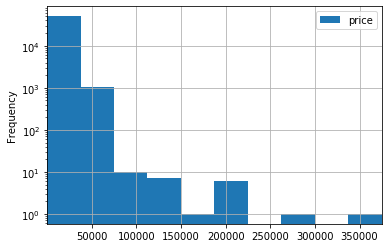

In [25]:
car_sales_df[['price']].plot(kind='hist',grid=True,bins = 10,xlim=(car_sales_df['price'].min(),car_sales_df['price'].max()),logy =True)

As we see, we have outliers

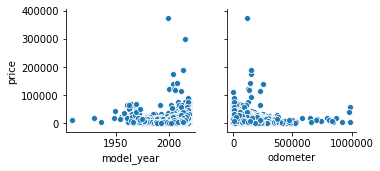

In [26]:
sns.pairplot(data=car_sales_df,
                  y_vars=['price'],
                  x_vars=["model_year" , "odometer"])

In [27]:
car_sales_df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

- 1 is an illogical value for the `price`

In [28]:
car_sales_df.loc[car_sales_df['price'] == 1, 'price'].sum()

798

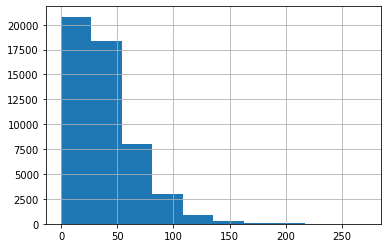

In [29]:
car_sales_df["days_listed"].hist()

**Study correlation between columns**

In [30]:
car_sales_df[['price','model_year','cylinders','odometer','is_4wd','days_listed']].corr() 

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


After an inversigation on the data, we can see that:
- 5 among 13 columns contain missing values. Which are: 
    - `model_yers`
    
    - `cylinders`	
    
    - `odometer`
    
    - `paint_color`	
    
    - `is_4wd`
- Missing values vary from ≈ 7% to 50% 
- We can see a correlation between some columns
- `price` column contains an illogical value and many outliers.


## Data preprocessing

We set the dataframe for only missing values:

In [31]:
just_na.head()

,na_model_yers,na_cylinders,na_odometer,na_paint_color,na_is_4wd
0,2011.0,6.0,145000.0,NaN,1.0
1,NaN,6.0,88705.0,white,1.0
2,2013.0,4.0,110000.0,red,NaN
3,2003.0,8.0,NaN,NaN,NaN
4,2017.0,4.0,80903.0,black,NaN


**`is_4wd` column**
- Filling NA in `is_4wd` column, it's clear that NA are 0 since it's a boolean column.

In [32]:
car_sales_df['is_4wd'] = car_sales_df['is_4wd'].fillna(value = 0).reset_index(drop = True)

In [33]:
car_sales_df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

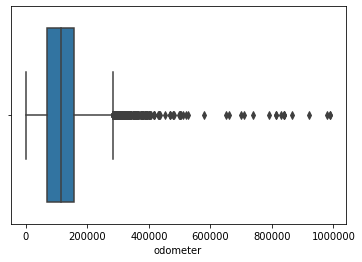

In [34]:
sns.boxplot(car_sales_df['odometer'])

In [35]:
car_sales_df.odometer.median()

113000.0

**`odometer` column**
- As we've seen, the correlation between `odometer` and `price` columns is negative, wich means that the relationship between those two columns runs in the opposite. 

In [36]:
median_odometer = car_sales_df['odometer'].median()
car_sales_df['odometer'] = car_sales_df['odometer'].fillna(value = median_odometer).reset_index(drop=True)

In [37]:
car_sales_df['odometer'].isna().sum()

0

In [38]:
car_sales_df[["odometer", "price"]].corr()

,odometer,price
odometer,1.000000,-0.385239
price,-0.385239,1.000000


Now we can decide about the correlation.

**`cylinders` column**
- As we've seen, there is a strong correlation between `price` and `cylinders` column: 0.296627.

In [39]:
max_cylinders = car_sales_df['cylinders'].max() 
max_cylinders

12.0

In [40]:
min_cylinders = car_sales_df['cylinders'].min()
min_cylinders

3.0

- Trying to fill the NA values with the mean as we don't have any outliers. 

In [41]:
mean_cylinders = car_sales_df['cylinders'].mean()
car_sales_df['cylinders'] = car_sales_df['cylinders'].fillna(value = mean_cylinders).reset_index(drop=True)

In [42]:
car_sales_df['cylinders'].isna().sum()

0

**`model_year` column**

- We see an interesting correlation with `price`, `cylinders` and `odometer`

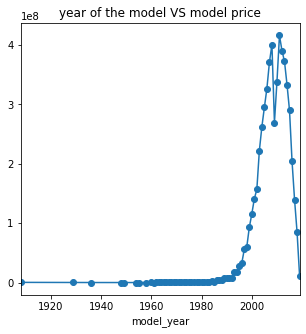

In [43]:
car_sales_df.groupby(['model_year'])['odometer'].agg('sum').plot(style='o-',title='year of the model VS model price',figsize=(5,5))

In [44]:
print(car_sales_df['model_year'].max())
print(car_sales_df['model_year'].min()) 

2019.0
1908.0


In [45]:
max_price = car_sales_df['price'].max()
min_price = car_sales_df['price'].min()
mean_price = car_sales_df['price'].mean()
median_price = car_sales_df['price'].median()
print(max_price)
print(min_price)
print(median_price)
print(mean_price)

375000
1
9000.0
12132.464919941776


In [46]:
def categorizing_price(price):
    if price >= 1 and price <= 9000:
        return 'low'
    if price > 9000 and price <= 12132:
        return 'medium'
    if price > 12132:
        return 'high'
car_sales_df['price_category'] = car_sales_df['price'].apply(categorizing_price)
print(car_sales_df['price_category'].value_counts())

low       25884
high      19694
medium     5947
Name: price_category, dtype: int64


- I beleive we can't fill in Years missing here with any value, we will drop it.

In [47]:
car_sales_clean = car_sales_df.dropna(subset=['model_year']).reset_index(drop=True)

In [48]:
car_sales_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_category
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,medium
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,low
2,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,0.0,2019-03-22,9,low
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,high
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,high


**`paint_color` column**

- We will try to replace NA here with the most frequent value which is `white`

In [49]:
car_sales_clean['paint_color'] = car_sales_clean['paint_color'].fillna(value = 'white').reset_index(drop=True)

In [50]:
car_sales_clean['paint_color'].isna().sum()

0

**`price` column**

In [51]:
car_sales_clean[car_sales_clean['price'] == 1].pivot_table(index='model', values='price', aggfunc='sum')

,price
model,
chevrolet camaro,47
chevrolet colorado,5
chevrolet corvette,2
chevrolet equinox,1
chevrolet malibu,3
chevrolet silverado,9
chevrolet silverado 1500,12
chevrolet silverado 2500hd,1
chevrolet suburban,13


In [52]:
price_mean = car_sales_clean['price'].mean()
price_mean

12160.465202688598

In [53]:
model_name = car_sales_clean['model'].unique()
model_name

array(['bmw x5', 'hyundai sonata', 'ford f-150', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'toyota rav4', 'chevrolet silverado',
       'jeep wrangler', 'chevrolet malibu', 'ford fusion se',
       'chevrolet impala', 'chevrolet corvette', 'jeep liberty',
       'toyota camry le', 'nissan altima', 'subaru outback',
       'toyota highlander', 'dodge charger', 'toyota tacoma',
       'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'jeep grand cherokee laredo',


In [54]:
car_sales_clean.loc[car_sales_clean.price== 1,'price'] = price_mean

In [55]:
car_sales_clean.query('price == 1')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_category


In [56]:
price_mean = car_sales_clean['price'].mean()
price_mean

12349.814366492832

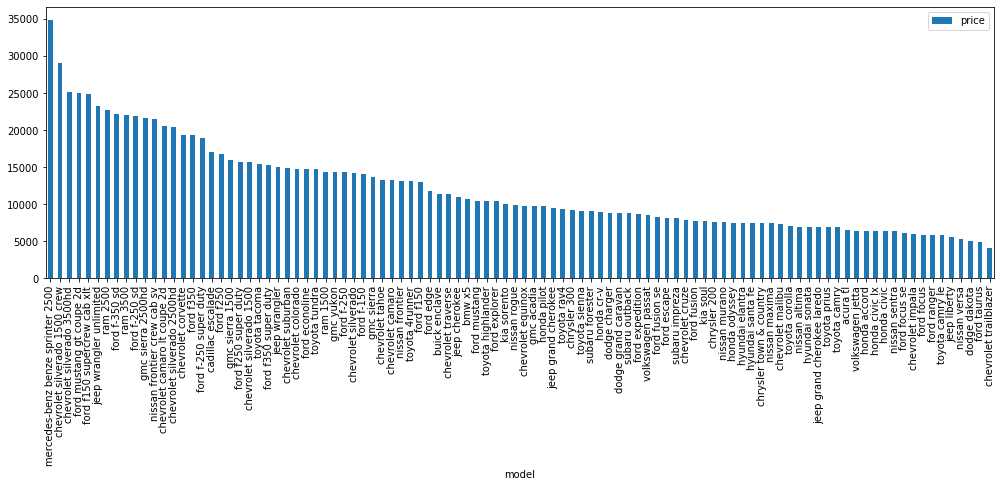

In [57]:
name_models.sort_values(by='price',ascending=False).plot(kind='bar', figsize=(17,5))

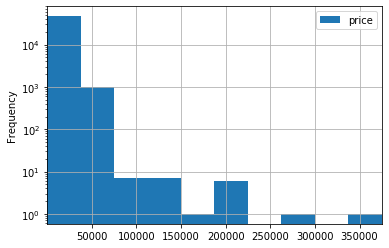

In [58]:
car_sales_clean[['price']].plot(kind='hist',grid=True,bins = 10,xlim=(car_sales_clean['price'].min(),car_sales_clean['price'].max()),logy =True)

In [59]:
car_sales_clean.min()

price                      3
model_year              1908
model               acura tl
condition          excellent
cylinders                  3
fuel                  diesel
odometer                   0
transmission       automatic
type                     SUV
paint_color            black
is_4wd                     0
date_posted       2018-05-01
days_listed                0
price_category          high
dtype: object

Outliers are still here, I googled about the price of the cheapest car in the US in 2019 and found even the oldest one can't be under 1000$

In [60]:
car_sales_clean.query('price <= 1000').count()

price             709
model_year        709
model             709
condition         709
cylinders         709
fuel              709
odometer          709
transmission      709
type              709
paint_color       709
is_4wd            709
date_posted       709
days_listed       709
price_category    709
dtype: int64

we should get rid of these values

In [61]:
car_sales_clean.loc[car_sales_clean.price <= 1000,'price'] = price_mean

In [62]:
car_sales_clean.query('price <= 1000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_category


- **Checking now on Data Types, if any replacement is needed**

In [63]:
car_sales_clean.dtypes

price             float64
model_year        float64
model              object
condition          object
cylinders         float64
fuel               object
odometer          float64
transmission       object
type               object
paint_color        object
is_4wd            float64
date_posted        object
days_listed         int64
price_category     object
dtype: object

I see we should replace `model_year`, `cylinders`, `odometer`, `is_4wd` from float64 to int.

In [64]:
car_sales_clean['model_year'] = car_sales_clean['model_year'].astype('int64')
car_sales_clean['cylinders'] = car_sales_clean['cylinders'].astype('int64')
car_sales_clean['odometer'] = car_sales_clean['odometer'].astype('int64')
car_sales_clean['is_4wd'] = car_sales_clean['is_4wd'].astype('int8')

In [65]:
car_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47906 entries, 0 to 47905
Data columns (total 14 columns):
price             47906 non-null float64
model_year        47906 non-null int64
model             47906 non-null object
condition         47906 non-null object
cylinders         47906 non-null int64
fuel              47906 non-null object
odometer          47906 non-null int64
transmission      47906 non-null object
type              47906 non-null object
paint_color       47906 non-null object
is_4wd            47906 non-null int8
date_posted       47906 non-null object
days_listed       47906 non-null int64
price_category    47906 non-null object
dtypes: float64(1), int64(4), int8(1), object(8)
memory usage: 4.8+ MB


### Conclusion

- We identified, analysed and cleaned our dataframe. Replaced NAs in:
    - `is_4wd` column with 0
    
    - `odometer` col with median
    
    - `cylinders` col with mean
    
    - `paint_color` col, with 'white' color
    
    - `model_year` col, droped them
    
    - `price` col, replaced prices < 1000 with mean


## Make calculations and add them to the table

Adding the following:
- Day of the week, month, and year the ad was placed
- The vehicle's age (in years) when the ad was placed
- The vehicle's average mileage per year

Starting with: 
- **Day of the week, month, and year the ad was placed**

In [66]:
#date_posted
car_sales_clean['date_placed'] = pd.to_datetime(car_sales_clean['date_posted'], format='%Y-%m-%d')

In [67]:
car_sales_clean.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_category,date_placed
0,9400.0,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,1,2018-06-23,19,medium,2018-06-23
1,5500.0,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,low,2019-02-07


- **The vehicle's age (in years) when the ad was placed**

In [68]:
#year(date_posted) - model_year
car_sales_clean['year_placed'] = car_sales_clean['date_placed'].dt.year

In [69]:
car_sales_clean.head(2) 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_category,date_placed,year_placed
0,9400.0,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,1,2018-06-23,19,medium,2018-06-23,2018
1,5500.0,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,low,2019-02-07,2019


In [70]:
car_sales_clean['age_vehicul'] = car_sales_clean['year_placed'] - car_sales_clean['model_year'] 

In [71]:
car_sales_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_category,date_placed,year_placed,age_vehicul
0,9400.0,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,1,2018-06-23,19,medium,2018-06-23,2018,7
1,5500.0,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,low,2019-02-07,2019,6
2,1500.0,2003,ford f-150,fair,8,gas,113000,automatic,pickup,white,0,2019-03-22,9,low,2019-03-22,2019,16
3,14900.0,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,high,2019-04-02,2019,2
4,14990.0,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,high,2018-06-20,2018,4


- **The vehicle's average mileage per year**

In [72]:
car_sales_clean.pivot_table(index='model_year', values='odometer', aggfunc='mean')

,odometer
model_year,
1908,141164.000000
1929,113000.000000
1936,30000.000000
1948,4000.000000
1949,1800.000000
...,...
2015,87219.200722
2016,69202.862898
2017,57811.149235


In [73]:
car_sales_clean['avg_mileage'] = car_sales_clean.groupby('model_year')['odometer'].transform('mean')

In [74]:
car_sales_clean.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_category,date_placed,year_placed,age_vehicul,avg_mileage
0,9400.0,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,1,2018-06-23,19,medium,2018-06-23,2018,7,123336.693037
1,5500.0,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,low,2019-02-07,2019,6,104952.941392
2,1500.0,2003,ford f-150,fair,8,gas,113000,automatic,pickup,white,0,2019-03-22,9,low,2019-03-22,2019,16,154695.621434


- **In `condition` column, replacing string values with a numeric scale:**
    - new = 5
    - like new = 4
    - excellent = 3
    - good = 2
    - fair = 1
    - salvage = 0

In [75]:
#creating a dict
condition_vehicule = {'new':5,'like new':4,'excellent':3,'good':2,'fair':1,'salvage':0}

In [76]:
car_sales_clean['condition'] = [condition_vehicule[item] for item in car_sales_clean['condition']]

In [77]:
car_sales_clean['condition'].value_counts()

3    23074
2    18695
4     4409
1     1492
5      133
0      103
Name: condition, dtype: int64

In [78]:
car_sales_clean.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_category,date_placed,year_placed,age_vehicul,avg_mileage
0,9400.0,2011,bmw x5,2,6,gas,145000,automatic,SUV,white,1,2018-06-23,19,medium,2018-06-23,2018,7,123336.693037
1,5500.0,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,low,2019-02-07,2019,6,104952.941392
2,1500.0,2003,ford f-150,1,8,gas,113000,automatic,pickup,white,0,2019-03-22,9,low,2019-03-22,2019,16,154695.621434


In [79]:
car_sales_clean[car_sales_clean.duplicated()].count()

price             0
model_year        0
model             0
condition         0
cylinders         0
fuel              0
odometer          0
transmission      0
type              0
paint_color       0
is_4wd            0
date_posted       0
days_listed       0
price_category    0
date_placed       0
year_placed       0
age_vehicul       0
avg_mileage       0
dtype: int64

### Conclusion

We've been able to make calculations regarding `model_year` and `odometer` columns, and adding new columns.
Also replaced in the condition column, string values with a numeric values.

## Carry out exploratory data analysis

### Task 1
- Study the following parameters: 
    - price, 
    - vehicle's age when the ad was placed, 
    - mileage, 
    - number of cylinders,
    - condition. 
- Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.

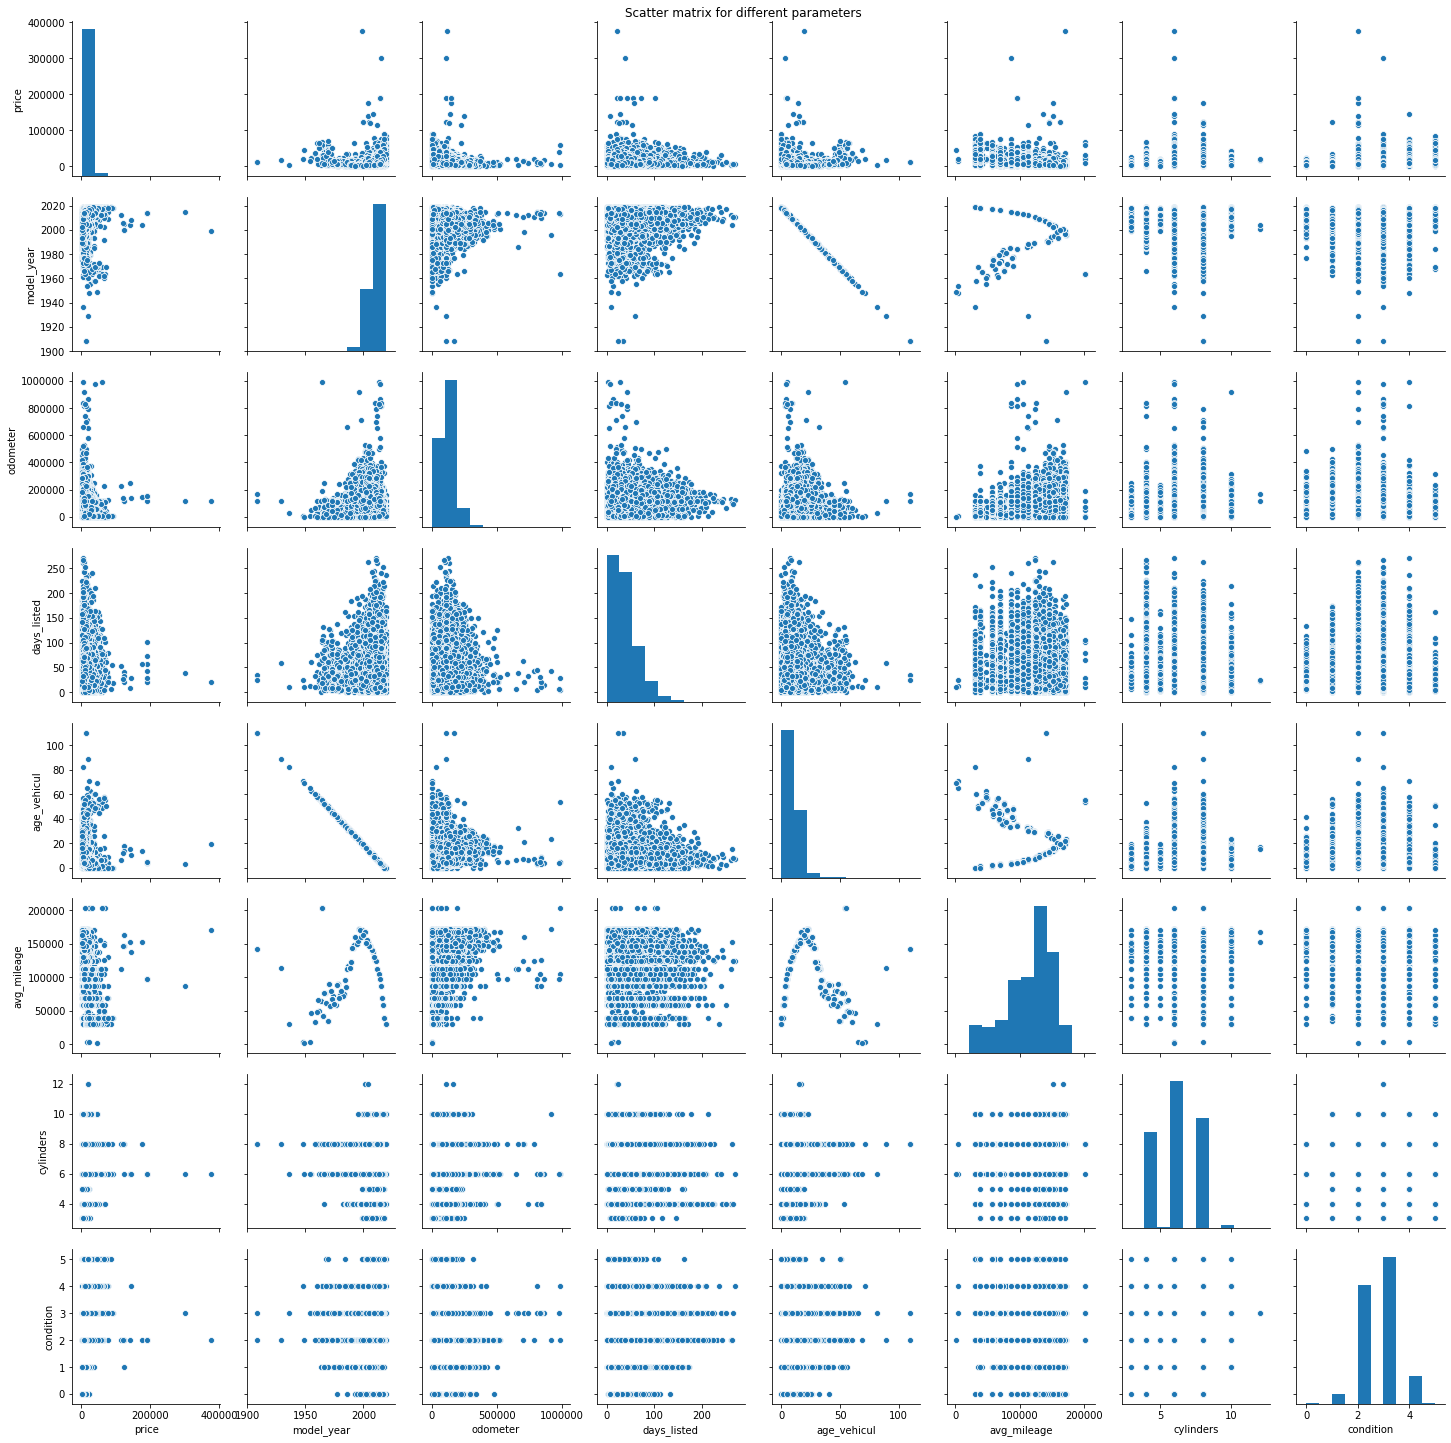

In [80]:
ax = sns.pairplot(
    car_sales_clean[['price', 'model_year', 'odometer', 'days_listed', 'age_vehicul','avg_mileage', 'cylinders', 'condition']]
)

ax.fig.suptitle('Scatter matrix for different parameters', y=1);

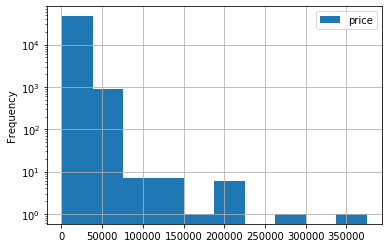

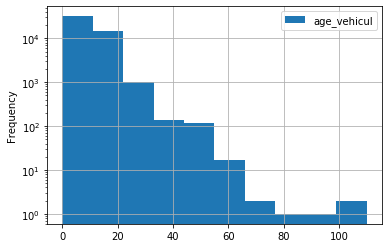

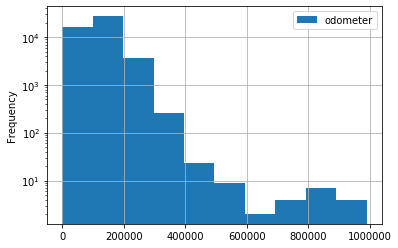

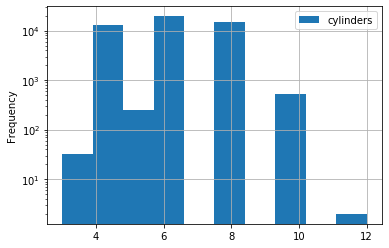

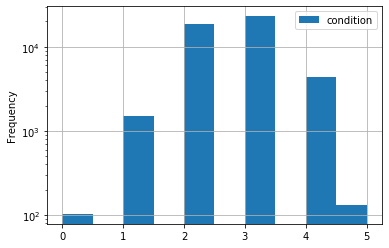

In [81]:
car_sales_clean[['price']].plot(kind='hist',grid=True,logy =True)
car_sales_clean[['age_vehicul']].plot(kind='hist', grid=True, logy =True)
car_sales_clean[['odometer']].plot(kind='hist', grid=True,logy =True)
car_sales_clean[['cylinders']].plot(kind='hist', grid=True,logy =True)
car_sales_clean[['condition']].plot(kind='hist', grid=True,logy =True)

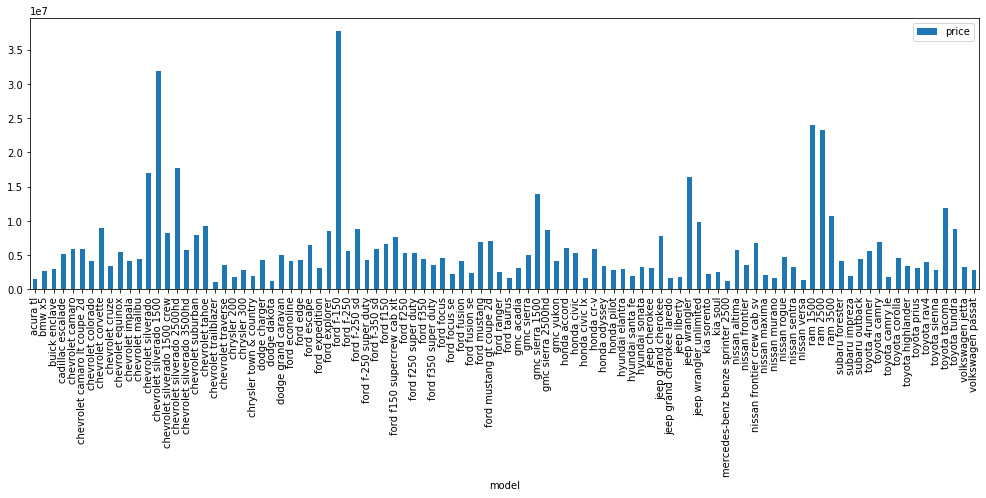

In [82]:
car_sales_clean.pivot_table(index='model',values='price', aggfunc='sum').plot(kind='bar', figsize=(17,5))

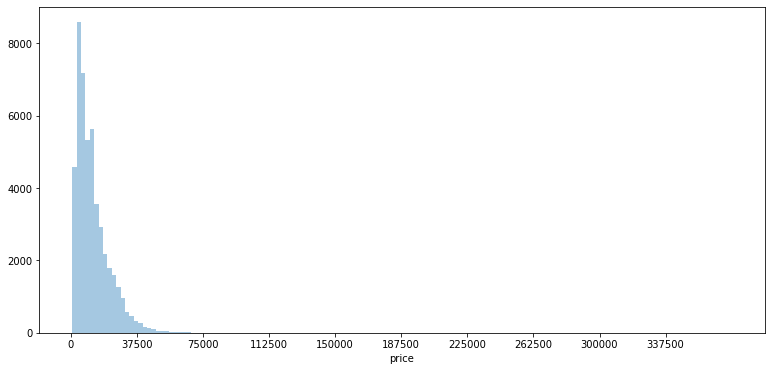

In [99]:
plt.figure(figsize=(13,6))
sns.distplot(car_sales_clean['price'], bins=150, kde=False)
plt.xticks(range(0, int(car_sales_clean['price'].describe()['max']), int(car_sales_clean['price'].describe()['max'] / 10)))
plt.show()
#many outliers in price column

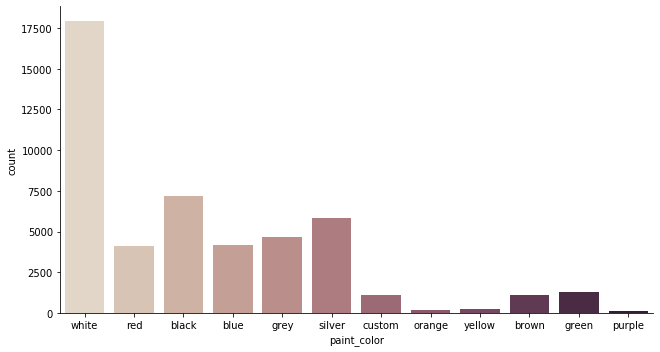

In [100]:
g = sns.catplot(x="paint_color", kind="count", palette="ch:.25", data=car_sales_clean)
g.fig.set_figwidth(10)
g.fig.set_figheight(5)

From the graph I can see that
- `price` has some high values between ≈ 150,000 and 170,000, and also between ≈ 270,000 and 400,000. Also some low values , and the majority is <≈ 55000 
- `age_vehicul` few of cars are ≈older than 68 whereas the majority is ≈under 68
- `odometer` most odometers cars are between 0 and ≈ 300,000
- very few cars are 12-`cylinders`
- the majority of cars are in 'like new','excellent' and 'good' `condition`
- every brand has the very cheapest and the very expensive car

In [101]:
car_sales_clean[['price', 'age_vehicul', 'odometer', 'cylinders', 'condition']].describe()

,price,age_vehicul,odometer,cylinders,condition
count,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000
mean,12523.703804,8.556966,115053.673632,6.113368,2.638605
std,9861.166938,6.295266,60019.830639,1.572898,0.711839
min,1005.000000,0.000000,0.000000,3.000000,0.000000
25%,5500.000000,4.000000,79000.000000,4.000000,2.000000
50%,9995.000000,7.000000,113000.000000,6.000000,3.000000
75%,16900.000000,12.000000,146327.000000,8.000000,3.000000
max,375000.000000,110.000000,990000.000000,12.000000,5.000000


- We can see that `price`, `age_vehicul`, `odometer` columns have significant outliers.

### Task 2
- Determine the upper limits of outliers, 
- remove the outliers and 
- store them in a separate DataFrame, and 
- continue your work with the filtered data

We will be using **Z-score** and **standard deviation** to detect and remove outliers.
- Z score = (x -mean) / std. deviation
- "*The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.*"

In [103]:
from IPython.display import Image
Image(url="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png")

<Figure size 936x432 with 0 Axes>

A normal distribution is shown below and it is estimated that: 
- 68% of the data points lie between +/- 1 standard deviation.
- 95% of the data points lie between +/- 2 standard deviation
- 99.7% of the data points lie between +/- 3 standard deviation

- **We determine the upper/lower limits of outliers**:

In [ ]:
iqr = car_sales_clean[['price', 'age_vehicul', 'odometer']].quantitle(0.75) - car_sales_clean[['price', 'age_vehicul', 'odometer']].quantitle(0.25)

car_outlier_up = car_sales_clean[['price', 'age_vehicul', 'odometer']].quantitle(0.75) + iqr*(1.5)

car_outlier_low = car_sales_clean[['price', 'age_vehicul', 'odometer']].quantitle(0.75) - iqr*(1.5)

### Task 3

- Use the filtered data to plot new histograms. 
- Compare them with the earlier histograms (the ones that included outliers). 
- Draw conclusions for each histogram.

### Task 4



### Task 5 

- **Price Mean**:

In [105]:
price_mean = car_sales_clean['price'].mean()
price_mean

12523.703803846056

- **Price Standard deviation**:

In [106]:
price_std = car_sales_clean['price'].std()
price_std

9861.166937768961

- **3 standard deviation**:
    - min:

In [107]:
car_sales_clean['price'].mean()-car_sales_clean['price'].std()*3

-17059.797009460828

- **3 standard deviation**:
    - max:

In [108]:
car_sales_clean['price'].mean()+car_sales_clean['price'].std()*3

42107.20461715294

- **Z-score in price**:

In [109]:
from scipy import stats
stats.zscore(car_sales_clean['price'])

array([-0.31677148, -0.71226632, -1.11790206, ..., -0.86945017,
       -0.51401185, -0.63113917])

**Price**

Let's first identify the most expensive cars

In [ ]:
car_sales_clean.sort_values(by='price',ascending=False).head(20)

The car that accurs 7 times is **ford f-150** 

- Let's slice the data using `model = ford f-150`

In [ ]:
car_ads_sample = car_sales_clean.query('model == "ford f-150"')

In [ ]:
len(car_ads_sample)

Now comparing our new data slice and the original dataframe;
- if the two are different, possible that ford f-150 is an outlier

In [ ]:
car_sales_ads.describe()

In [ ]:
car_ads_sample.describe()

In [ ]:
car_sales_ads[['price']].plot(kind='hist',grid=True,logy =True, range=(0,375000), bins=100)

In [ ]:
car_ads_sample[['price']].plot(kind='hist',grid=True,logy =True, range=(0,375000), bins=100)

- Histograms look almost similar with nearly similar peaks, one at 12500, and second at ≈ 175000
- but still no conclusions yet

Now creating a plot on `car_ads_sample` including the price and the age

In [ ]:
car_ads_sample.plot(x='age_vehicul', y='price', ylim=(car_ads_sample['price'].min(), car_ads_sample['price'].max()), style='o', grid=True, figsize=(10,4))

**Mileage per year**

In [ ]:
car_sales_ads.sort_values(by='odometer',ascending=False).head()

In [ ]:
car_sales_ads['odometer'].describe()

## Overall conclusion

# Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [ ]  missing values filled in
- [ ]  clarification of the discovered missing values provided
- [ ]  data types converted
- [ ]  explanation of which columns had the data types changed and why
- [ ]  calculated and added to the table: day of the week, month, and year the ad was placed
- [ ]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [ ]  calculated and added to the table: the vehicle's average mileage per year
- [ ]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [ ]  histograms for each parameter created
- [ ]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [ ]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [ ]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [ ]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [ ]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [ ]  each stage has a conclusion
- [ ]  overall conclusion drawn